In [6]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vanderpol(y,t,mu):
    """ Return the derivative vector for the van der Pol equations."""
    sol = [y[1], -y[0] + (1-y[0]**2)*y[1]]
    return sol

def run_vanderpol(yinit=[2,0], tfinal=20, mu=2):
    """ Example for how to run odeint.

    More info found in the doc_string. In ipython type odeint?
    """
    times = linspace(0,tfinal,200)

    rtol=1e-6
    atol=1e-10

    y = odeint(vanderpol, yinit, times, args= (mu,), rtol=rtol, atol=atol)
    return y,times

def draw_figure(y,t):
    plt.subplot(2,2,1)
    plt.plot(t, y[:,0])
    plt.title("Time Profile of y1")
    plt.subplot(2,2,3)
    plt.plot(t, y[:,1])
    plt.title("Time Profile of y2")
    # plt.subplot2grid((2,2),(0,1),rowspan=2)
    # in 2x2 grid of subplots, draw in (0,1)-->upper right, 
    # and make the plot span two rows of plots (height is twice normal)
    plt.subplot2grid((2,2),(0,1),rowspan=2)
    plt.plot(y[:,0], y[:,1],'-ok')
    plt.title("Phase Portrait")

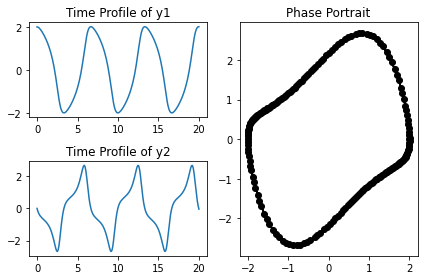

In [7]:
y,t = run_vanderpol([2,0], tfinal=20, mu=2)
draw_figure(y,t)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Phase Portrait')

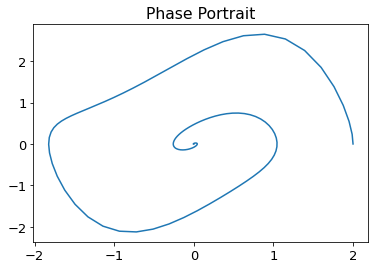

In [23]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

font = {'size'   : 13}

matplotlib.rc('font', **font)

def vanderpol(y,t,mu):
    """ Return the derivative vector for the van der Pol equations."""
    sol = [-y[1], y[0] - (1-y[0]**2)*y[1]]
    return sol

def run_vanderpol(yinit=[2,0], tfinal=20, mu=1):
    """ Example for how to run odeint.

    More info found in the doc_string. In ipython type odeint?
    """
    times = linspace(0,tfinal,200)

    rtol=1e-6
    atol=1e-10

    y = odeint(vanderpol, yinit, times, args= (mu,), rtol=rtol, atol=atol)
    return y,times


y_van,t = run_vanderpol([2,0], tfinal=20, mu=1)
plt.plot(y_van[:,0], y_van[:,1])
plt.title("Phase Portrait")


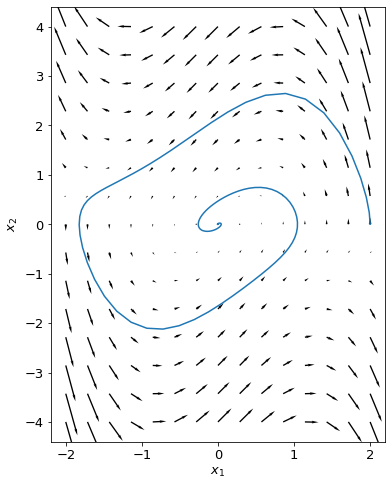

In [24]:
bounds = [2,4]
dim = 2
# van poole equation
def vf(x):
    y = [-x[:,1], x[:,0] - (1-x[:,0]**2)*x[:,1]]
    return y


# number of x points
n_x = 15
x = np.linspace(-bounds[0], bounds[0], n_x)
y = np.linspace(-bounds[1], bounds[1], n_x)

X, Y = np.meshgrid(x, y)

s = X.shape

Ze = np.zeros(s)
Zp = np.zeros(s)
DT = np.zeros((n_x**2,dim)) 

# convert mesh into point vector for which the model can be evaluated
c = 0
for i in range(s[0]):
    for j in range(s[1]):
        DT[c,0] = X[i,j]
        DT[c,1] = Y[i,j]
        c = c+1;
# define vector field for plot
new_vf = np.reshape(np.array(vf(DT)), (dim, n_x, n_x))


plt.figure(figsize=(6,8))
q1 = plt.quiver(X,Y, new_vf[0], new_vf[1], headwidth=2, headlength=5)
plt.plot(y_van[:,0], y_van[:,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('trvpe.pdf')
plt.show()